In [42]:
import pandas as pd
import numpy as np 
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [43]:
#Reading Application train csv
data_df = pd.read_csv("UCI_Credit_Card_new.csv")
print(data_df.shape)
print(data_df.head())

(30000, 25)
   ID  LIMIT_BAL     SEX   EDUCATION MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  \
0   1      20000  female  university  married  24.0      2      2     -1   
1   2     120000  female  university   single  26.0     -1      2      0   
2   3      90000  female  university   single  34.0      0      0      0   
3   4      50000     NaN  university  married  37.0      0      0      0   
4   5      50000    male  university  married  57.0     -1      0     -1   

   PAY_4             ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0     -1             ...                    0.0          0        0.0   
1      0             ...                 3272.0       3455     3261.0   
2      0             ...                14331.0      14948    15549.0   
3      0             ...                28314.0      28959    29547.0   
4      0             ...                20940.0      19146    19131.0   

   PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0         0       689      

In [44]:
#We can see clearly its a class imbalance problem.
#As a general rule if more than 50% missing we may try to remove those columns in one of tries and even discuss with business for importance
#Now analyze missing value
mis_val = data_df.isnull().sum()
print(mis_val)
#writing the outcome to csv to analyze further
mis_val.to_csv('case1_credit_card.csv')

ID                              0
LIMIT_BAL                       0
SEX                           113
EDUCATION                     161
MARRIAGE                      105
AGE                            93
PAY_0                           0
PAY_2                           0
PAY_3                           0
PAY_4                           0
PAY_5                           0
PAY_6                           0
BILL_AMT1                       0
BILL_AMT2                       0
BILL_AMT3                       0
BILL_AMT4                      21
BILL_AMT5                       0
BILL_AMT6                      16
PAY_AMT1                        0
PAY_AMT2                        0
PAY_AMT3                       18
PAY_AMT4                        0
PAY_AMT5                        0
PAY_AMT6                        0
default.payment.next.month      0
dtype: int64


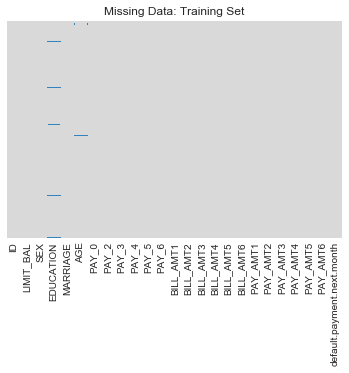

In [45]:
#finding missing data using heatmap
sns.heatmap(data_df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [46]:
#SEX,EDUCATION,MARRIAGE,BILL_AMT4,BILL_AMT6,PAY_AMT3 has missing values
data_df = data_df.rename(columns={'default.payment.next.month': 'default'})

Target Variable
default
0    23364
1     6636
Name: default, dtype: int64


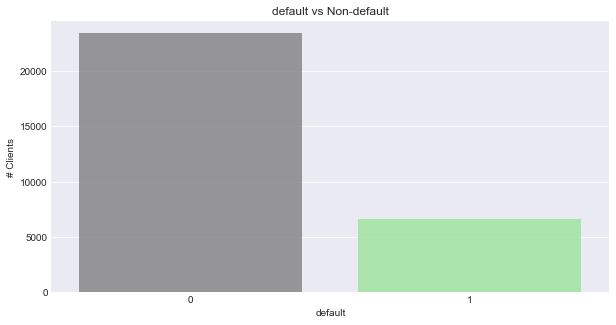

In [47]:
#Target Variable 'default.payment.next.month' is our target as that is the dependent variable we are trying to predict.
# default.payment.next.month Count
print('Target Variable')
print(data_df.groupby(['default']).default.count())
#Plotting target variable
# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
#Alpha is used for , it makes the bars semi-translucent. 
sns.countplot(data_df['default'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('default vs Non-default')
plt.ylabel('# Clients')
plt.show()

# Categorical features analysis

In [48]:
#It shows that it is a clear case of class imbalance
#Now we will analyze the types of Features( Categorical, Neumerical etc)
# Number of each type of column
print(data_df.dtypes.value_counts())
print('number of unique entries in each of the object (categorical) columns>>>>>>>>>>>>>')
# Number of unique classes in each object column
print(data_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0))

int64      18
float64     4
object      3
dtype: int64
number of unique entries in each of the object (categorical) columns>>>>>>>>>>>>>
SEX          2
EDUCATION    4
MARRIAGE     3
dtype: int64


In [49]:
#Function for plotting Categorical columns with Target
def plot_categorical(df,attr1='',attr2=''):
    f,ax=plt.subplots(1,2,figsize=(15,6))
    df[[attr1,attr2]].groupby([attr1]).count().plot.bar(ax=ax[0],color='Green')
    ax[0].set_title('count of clients Based on'+attr1)
    sns.countplot(attr1,hue=attr2,data=df,ax=ax[1],palette="spring")
    ax[1].set_title(attr1+': Defaulter vs Non-Defaulter')
    # Rotate x-labels
    plt.xticks(rotation=-90)
    my_plot=plt.show()
    return my_plot

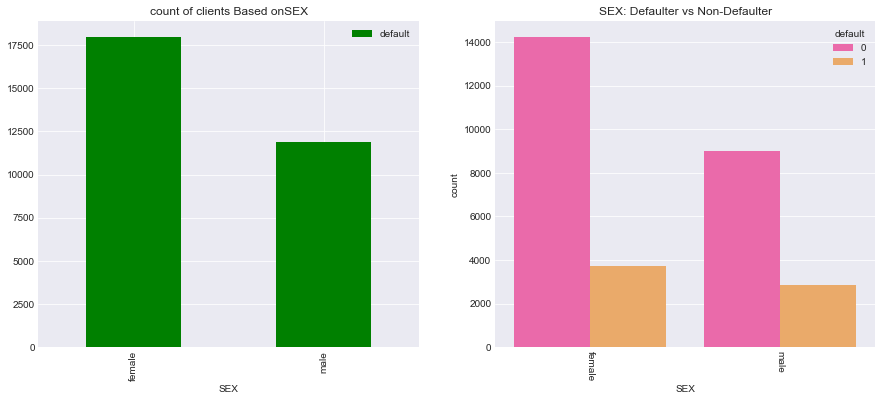

In [50]:
#plotting SEX with Target
plot_categorical(data_df,'SEX','default')

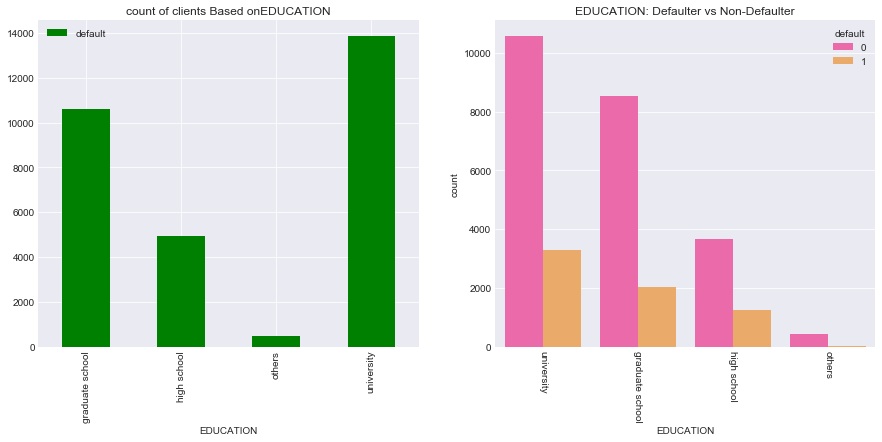

In [51]:
#Number of default cases are more in females than in males
#plotting EDUCATION with Target
plot_categorical(data_df,'EDUCATION','default')

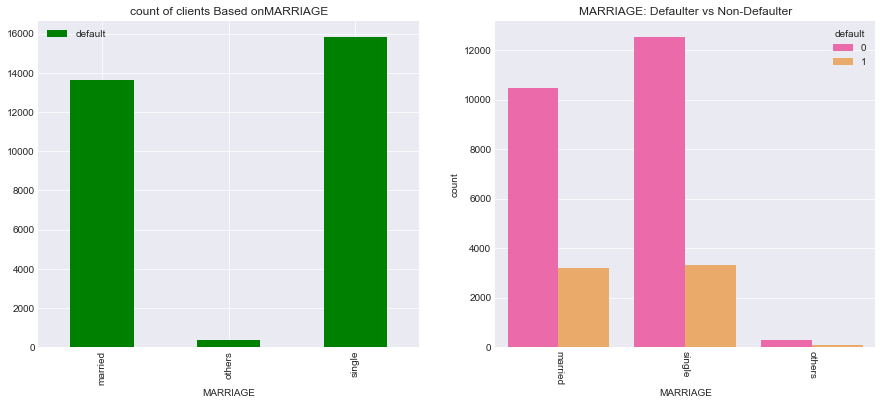

In [12]:
#Number of default cases are more for University than rest
#plotting EDUCATION with Target
plot_categorical(data_df,'MARRIAGE','default')

# Float features analysis

In [13]:
#singles are slightly more defaulter than rest
#Let us analyse float64 columns
data_df.select_dtypes('float64').columns

Index(['AGE', 'BILL_AMT4', 'BILL_AMT6', 'PAY_AMT3'], dtype='object')

In [14]:
#quantiles
data_df['AGE'].describe()

count    29907.000000
mean        35.511084
std          9.219739
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [15]:
#Age seems to be valid
data_df['BILL_AMT4'].describe()

count     29979.000000
mean      43243.390340
std       64335.204543
min     -170000.000000
25%        2319.000000
50%       19034.000000
75%       54485.000000
max      891586.000000
Name: BILL_AMT4, dtype: float64

In [16]:
data_df['BILL_AMT6'].describe()

count     29984.000000
mean      38851.271078
std       59549.760630
min     -339603.000000
25%        1255.000000
50%       17046.000000
75%       49150.250000
max      961664.000000
Name: BILL_AMT6, dtype: float64

In [17]:
data_df['PAY_AMT3'].describe()

count     29982.000000
mean       5225.949336
std       17611.359280
min           0.000000
25%         390.000000
50%        1800.000000
75%        4503.000000
max      896040.000000
Name: PAY_AMT3, dtype: float64

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'PAY_AMT3 Distribution')

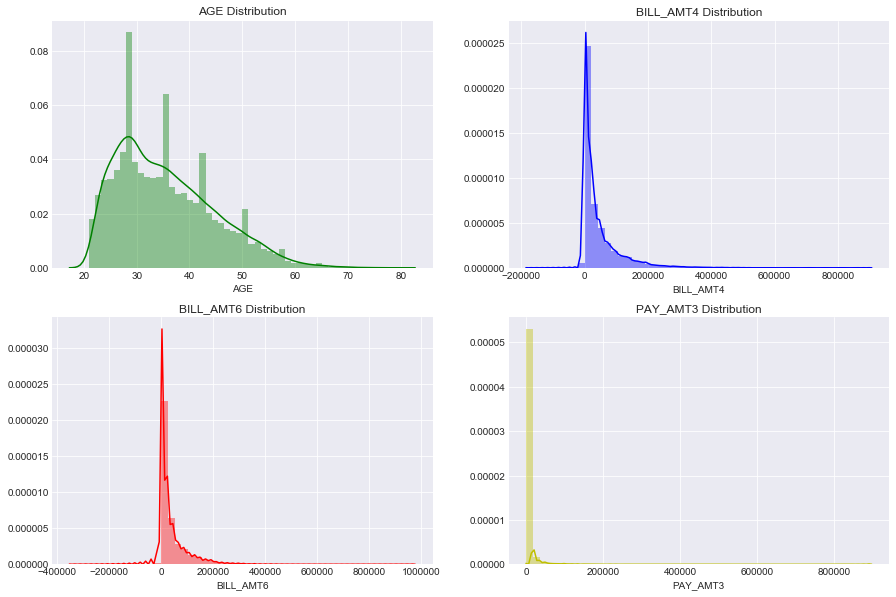

In [18]:
#dist plot a univariate distribution of observations. 
#The most common form of estimation is known as kernel density estimation(KDE).gaussian kernel density estimate
#Plotting  'AGE', 'BILL_AMT4', 'BILL_AMT6', 'PAY_AMT3'
# Set up the matplotlib figure
f, ax = plt.subplots(2,2, figsize=(15, 10))

# Graph age 
sns.distplot(data_df.AGE.dropna(), kde=True, color="g", ax=ax[0,0]).set_title('AGE Distribution')
# Graph BILL_AMT4 
sns.distplot(data_df.BILL_AMT4.dropna(), kde=True, color="b", ax=ax[0,1]).set_title('BILL_AMT4 Distribution')

# Graph BILL_AMT6  
sns.distplot(data_df.BILL_AMT6.dropna(), kde=True, color="r", ax=ax[1,0]).set_title('BILL_AMT6 Distribution')

# Graph PAY_AMT3 
sns.distplot(data_df.PAY_AMT3.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('PAY_AMT3 Distribution')

In [19]:
#Let us analyse int64 columns
data_df.select_dtypes('int64').columns

Index(['ID', 'LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT5', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [20]:
#Let us analyse 'LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3'
data_df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [21]:
data_df['PAY_0'].describe()

count    30000.000000
mean        -0.016700
std          1.123802
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_0, dtype: float64

In [22]:
data_df['PAY_2'].describe()

count    30000.000000
mean        -0.133767
std          1.197186
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_2, dtype: float64

In [23]:
data_df['PAY_3'].describe()

count    30000.000000
mean        -0.166200
std          1.196868
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_3, dtype: float64

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'PAY_3 Distribution')

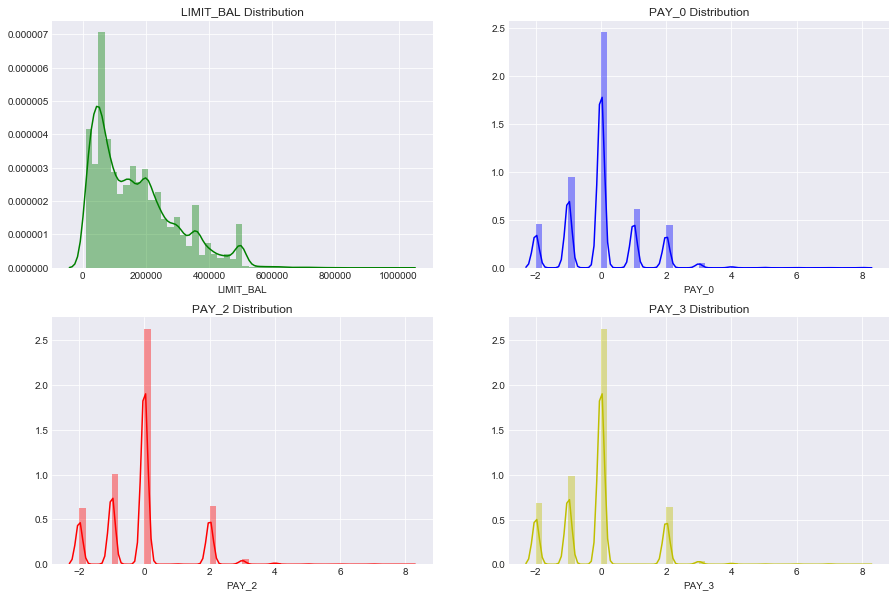

In [24]:
#Let us plot 'LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3'
# Set up the matplotlib figure
f, ax = plt.subplots(2,2, figsize=(15, 10))

# Graph LIMIT_BAL 
sns.distplot(data_df.LIMIT_BAL.dropna(), kde=True, color="g", ax=ax[0,0]).set_title('LIMIT_BAL Distribution')
# Graph PAY_0 
sns.distplot(data_df.PAY_0.dropna(), kde=True, color="b", ax=ax[0,1]).set_title('PAY_0 Distribution')

# Graph PAY_2  
sns.distplot(data_df.PAY_2.dropna(), kde=True, color="r", ax=ax[1,0]).set_title('PAY_2 Distribution')

# Graph PAY_3 
sns.distplot(data_df.PAY_3.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('PAY_3 Distribution')

In [25]:
#Let us analyse 'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1',
data_df['PAY_4'].describe()

count    30000.000000
mean        -0.220667
std          1.169139
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_4, dtype: float64

In [26]:
data_df['PAY_5'].describe()

count    30000.000000
mean        -0.266200
std          1.133187
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_5, dtype: float64

In [27]:
data_df['PAY_6'].describe()

count    30000.000000
mean        -0.291100
std          1.149988
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_6, dtype: float64

In [28]:
data_df['BILL_AMT1'].describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'BILL_AMT1 Distribution')

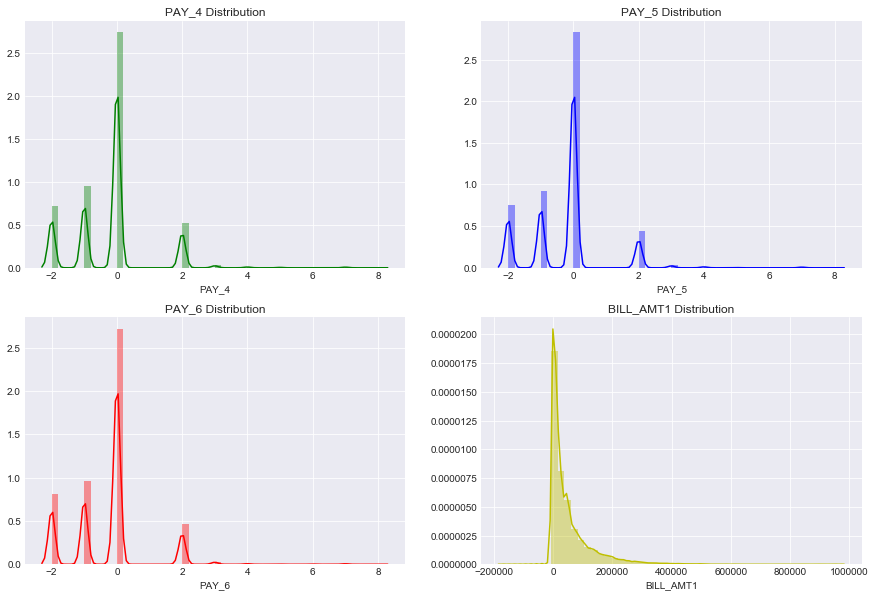

In [29]:
#Let us plot 'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1'
# Set up the matplotlib figure
f, ax = plt.subplots(2,2, figsize=(15, 10))

# Graph PAY_4 
sns.distplot(data_df.PAY_4.dropna(), kde=True, color="g", ax=ax[0,0]).set_title('PAY_4 Distribution')
# Graph PAY_5 
sns.distplot(data_df.PAY_5.dropna(), kde=True, color="b", ax=ax[0,1]).set_title('PAY_5 Distribution')

# Graph PAY_6  
sns.distplot(data_df.PAY_6.dropna(), kde=True, color="r", ax=ax[1,0]).set_title('PAY_6 Distribution')

# Graph BILL_AMT1 
sns.distplot(data_df.BILL_AMT1.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('BILL_AMT1 Distribution')

In [30]:
#Let us analyse 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT5', 'PAY_AMT1',
data_df['BILL_AMT2'].describe()

count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
25%        2984.750000
50%       21200.000000
75%       64006.250000
max      983931.000000
Name: BILL_AMT2, dtype: float64

In [31]:
data_df['BILL_AMT3'].describe()

count    3.000000e+04
mean     4.701315e+04
std      6.934939e+04
min     -1.572640e+05
25%      2.666250e+03
50%      2.008850e+04
75%      6.016475e+04
max      1.664089e+06
Name: BILL_AMT3, dtype: float64

In [32]:
data_df['BILL_AMT5'].describe()

count     30000.000000
mean      40311.400967
std       60797.155770
min      -81334.000000
25%        1763.000000
50%       18104.500000
75%       50190.500000
max      927171.000000
Name: BILL_AMT5, dtype: float64

In [33]:
data_df['PAY_AMT1'].describe()

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'PAY_AMT1 Distribution')

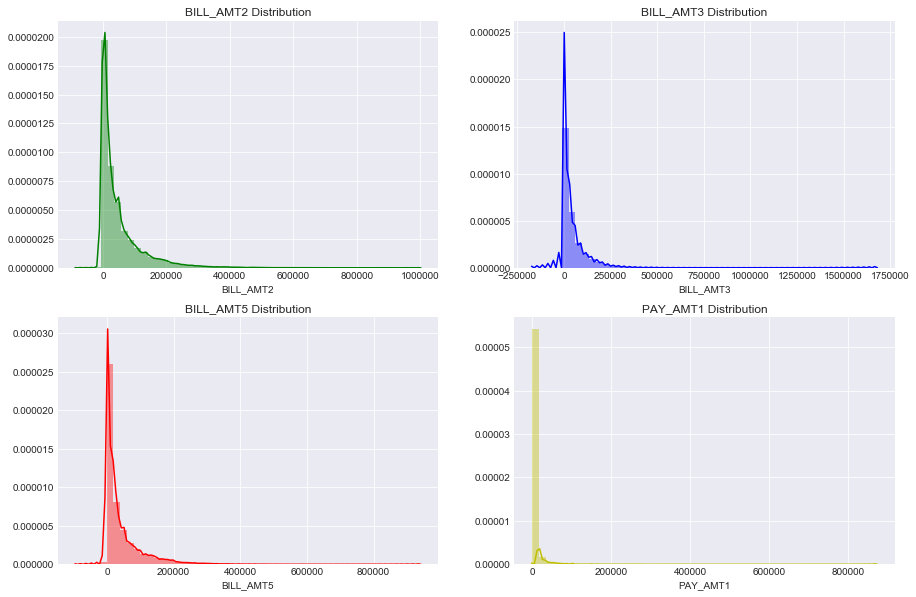

In [34]:
#Let us plot 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT5', 'PAY_AMT1'
# Set up the matplotlib figure
f, ax = plt.subplots(2,2, figsize=(15, 10))

# Graph BILL_AMT2 
sns.distplot(data_df.BILL_AMT2.dropna(), kde=True, color="g", ax=ax[0,0]).set_title('BILL_AMT2 Distribution')
# Graph BILL_AMT3 
sns.distplot(data_df.BILL_AMT3.dropna(), kde=True, color="b", ax=ax[0,1]).set_title('BILL_AMT3 Distribution')

# Graph BILL_AMT5  
sns.distplot(data_df.BILL_AMT5.dropna(), kde=True, color="r", ax=ax[1,0]).set_title('BILL_AMT5 Distribution')

# Graph PAY_AMT1 
sns.distplot(data_df.PAY_AMT1.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('PAY_AMT1 Distribution')

In [35]:
#Let us analyse 'PAY_AMT2', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
data_df['PAY_AMT2'].describe()

count    3.000000e+04
mean     5.921163e+03
std      2.304087e+04
min      0.000000e+00
25%      8.330000e+02
50%      2.009000e+03
75%      5.000000e+03
max      1.684259e+06
Name: PAY_AMT2, dtype: float64

In [36]:
data_df['PAY_AMT4'].describe()

count     30000.000000
mean       4826.076867
std       15666.159744
min           0.000000
25%         296.000000
50%        1500.000000
75%        4013.250000
max      621000.000000
Name: PAY_AMT4, dtype: float64

In [37]:
data_df['PAY_AMT5'].describe()

count     30000.000000
mean       4799.387633
std       15278.305679
min           0.000000
25%         252.500000
50%        1500.000000
75%        4031.500000
max      426529.000000
Name: PAY_AMT5, dtype: float64

In [38]:
data_df['PAY_AMT6'].describe()

count     30000.000000
mean       5215.502567
std       17777.465775
min           0.000000
25%         117.750000
50%        1500.000000
75%        4000.000000
max      528666.000000
Name: PAY_AMT6, dtype: float64

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'PAY_AMT6 Distribution')

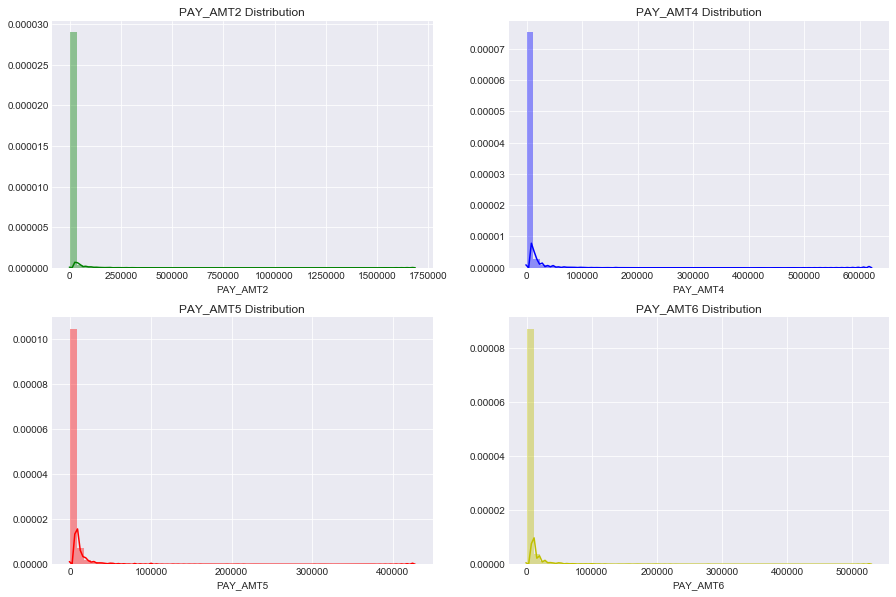

In [39]:
#Let us plot 'PAY_AMT2', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
# Set up the matplotlib figure
f, ax = plt.subplots(2,2, figsize=(15, 10))

# Graph PAY_AMT2 
sns.distplot(data_df.PAY_AMT2.dropna(), kde=True, color="g", ax=ax[0,0]).set_title('PAY_AMT2 Distribution')
# Graph PAY_AMT4 
sns.distplot(data_df.PAY_AMT4.dropna(), kde=True, color="b", ax=ax[0,1]).set_title('PAY_AMT4 Distribution')

# Graph PAY_AMT5  
sns.distplot(data_df.PAY_AMT5.dropna(), kde=True, color="r", ax=ax[1,0]).set_title('PAY_AMT5 Distribution')

# Graph PAY_AMT6 
sns.distplot(data_df.PAY_AMT6.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('PAY_AMT6 Distribution')

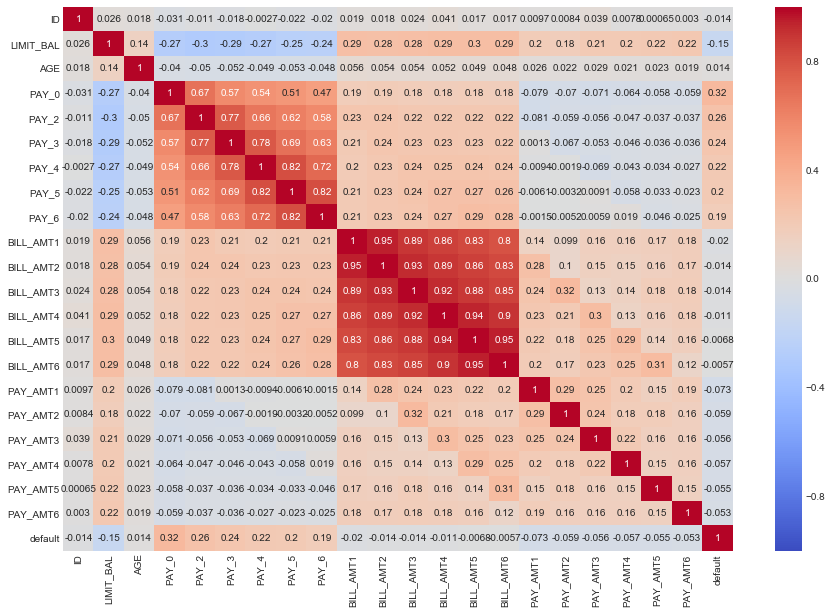

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(data_df.corr(),vmin=-1,cmap='coolwarm',annot=True);